In [10]:
library(tidyverse)
options(repr.plot.width=5, repr.plot.height=4)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.8     ✔ purrr   1.0.1
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.3     ✔ forcats 0.5.2

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# STATS 306
## Homework 4: Exploratory data analysis

For each problem, enter the R code in the cell marked "YOUR SOLUTION HERE".

## Problem 1: Whisker plots
Suppose you are given the following whisker plot for $n=500$ samples of a random variable $x$:
![whiser](https://i.imgur.com/HazzZQQ.png)

## Problem 1: Whisker plots 

This question is worth 1 point overall. 

**(a)** About how many samples were between 0.2 and 0.5?  

    Your Answer for 1a here
0.25*500 = 125

**(b)** The bottom of the "box" is at 0.0. What is this value typically called? Explain how this is calculated. 

    Your Answer for 1b here
The bottom of the box in a box plot is referred to as the first quartile, or Q1. It represents the 25% percentile of the data and separates the lowest 25% of the data from the rest.
To calculate the first quartile: we have to arrange the data in order from smallest to largest ---> If the number of data is odd, the first quartile is the median of the middle 50% of the data; if the number of data is even, the first quartile is the average of the middle two values of the data when it is arranged in order from smallest to largest.

**(c)** Explain what this plot tells us about our variable x. Why might you choose to make this plot? 

    Your Answer for 1c here
(1)It provides a summary of the distribution of the data(x), including the median, the quartiles, and any outliers. 

(2)The plot provides a quick way to see if the data is symmetric or skewed, and what the range and variability of the data looks like. By looking at the plot, we can identify any outliers or extreme values that might be affecting the overall distribution of the data.

## Problem 2: Understanding air quality
This problem uses the air quality dataset that we studied in lecture:

In [12]:
load(url('https://datasets.stats306.org/pm25.RData'))

colnames(pm25)
str(pm25)

[1] "date"   "state"  "county" "lat"    "lon"    "pm25"   "aqi"

tibble [2,640,700 × 7] (S3: tbl_df/tbl/data.frame)
 $ date  : Date[1:2640700], format: "2017-01-01" "2017-01-04" ...
 $ state : chr [1:2640700] "Alabama" "Alabama" "Alabama" "Alabama" ...
 $ county: chr [1:2640700] "Baldwin" "Baldwin" "Baldwin" "Baldwin" ...
 $ lat   : num [1:2640700] 30.5 30.5 30.5 30.5 30.5 ...
 $ lon   : num [1:2640700] -87.9 -87.9 -87.9 -87.9 -87.9 ...
 $ pm25  : num [1:2640700] 5 5.3 4.5 7.2 3.9 4.6 7 4.2 5.7 3.4 ...
 $ aqi   : num [1:2640700] 21 22 19 30 16 19 29 18 24 14 ...


For each of the questions, produce an appropriate plot that visualizes the distribution or statistic, and explain why this type of plot is appropriate. (Note: multiple correct answers are possible.)

**(a)** The overall distribution of `pm25` across the entire dataset. (1/2 point)

Warning message:
“Transformation introduced infinite values in continuous y-axis”
Warning message:
“Removed 498 rows containing missing values (`geom_bar()`).”


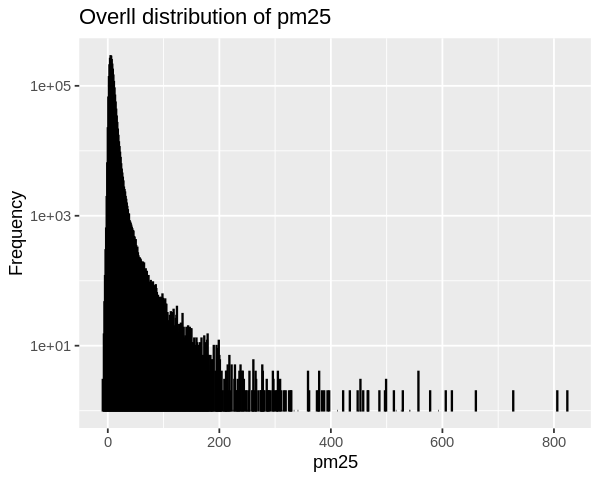

In [13]:
ggplot(pm25,aes(x=pm25))+
  geom_histogram(binwidth = 1,color="black", fill="blue")+
  scale_y_log10()+
  xlab("pm25")+
  ylab("Frequency")+
  ggtitle("Overll distribution of pm25")
#A histogram bar graph can represent the distribution of a set of continuous or discrete data by dividing the data into bins and counting the number of data points that fall into each bin

**(b)** The joint distribution of `pm25` and day of the week, considering only cases where `pm25` was less than 100. (1/2 point)  

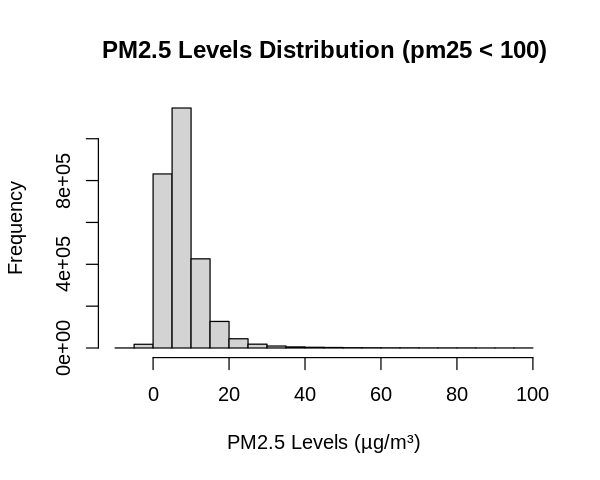

In [14]:
hist(pm25$pm25[pm25$pm25 < 100], main = "PM2.5 Levels Distribution (pm25 < 100)", xlab = "PM2.5 Levels (µg/m³)")

**(c)** The average `pm25` level for each month for Midwest states. We've provided a vector defining Midwestern states. Please use this in your answer! (1 point) 

In [18]:
midwest_states <- c("Illinois", "Indiana", "Iowa", "Kansas", "Michigan", "Minnesota", "Missouri", "Nebraska", "North Dakota", "Ohio", "South Dakota", "Wisconsin")

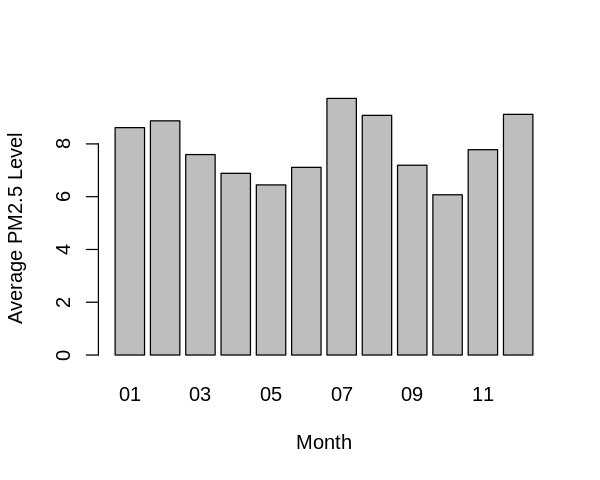

In [19]:
midwest_subset <- pm25[pm25$state %in% midwest_states, ]
midwest_subset$month <- format(midwest_subset$date, format="%m")
monthly_avg <- aggregate(midwest_subset$pm25, by=list(midwest_subset$month), mean)
barplot(monthly_avg$x, names.arg=monthly_avg$Group.1, xlab="Month", ylab="Average PM2.5 Level")

**(d)** The US EPA considers PM2.5 levels greater than $35 \mu g/m^3$ to be dangerous. For each day, plot the proportion of counties in California with PM2.5 levels considered to be dangerous, out of all counties in California. What do you notice? Can you think of a reason to explain this pattern? (1 point)


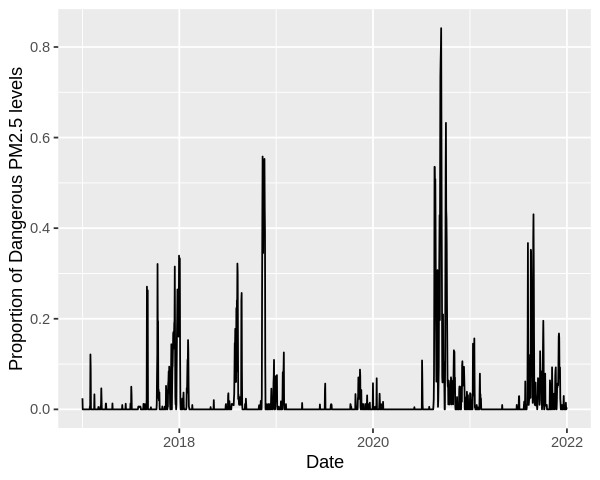

In [16]:
ca_pm25 <- subset(pm25, state == "California")
ca_dangerous <- aggregate(ca_pm25$pm25, by=list(ca_pm25$date), FUN=function(x) sum(x > 35)/length(x))
colnames(ca_dangerous) <- c("date", "proportion_dangerous")
library(ggplot2)
ggplot(ca_dangerous, aes(x=date, y=proportion_dangerous)) +
  geom_line() +
  xlab("Date") +
  ylab("Proportion of Dangerous PM2.5 levels")
#From the plot, we can see that the proportion fluctuates over time, but there is a general upward trend in the proportion of dangerous PM2.5 levels.
#The reason for this pattern is likely due to the increasing pollution levels in California and the US as a whole. 
#The rise in PM2.5 levels could be due to factors such as industrialization, urbanization, and population growth, which all contribute to air pollution.

**(e)** Define a state to be "large" if it has more than 15 counties, "medium" if it has more than 5 counties and no more than 15, and "small" if it has 5 or less counties. For each year, plot the average PM2.5 level (across all days in that year and all counties) for large, medium, and small states. (1 point)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

`summarise()` has grouped output by 'size'. You can override using the
`.groups` argument.


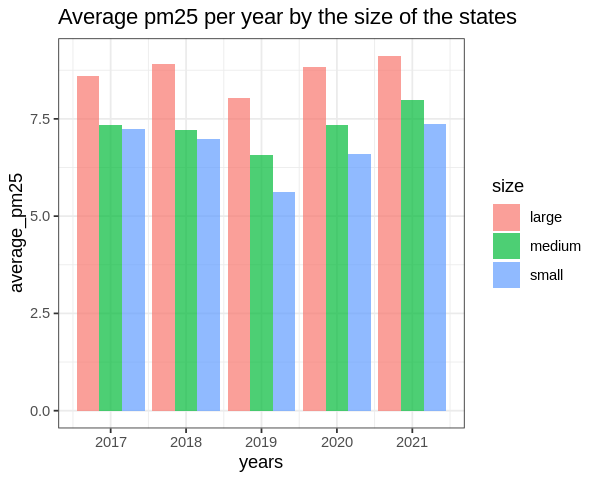

In [27]:
install.packages("lubridate")
options(repr.plot.width=5,repr.plot.height=4)
pm25 %>%
  group_by(state) %>%
  mutate(size=case_when(
  length(unique(county))>=15 ~ "large",
  length(unique(county))>=5  &length(unique(county))<15~"medium",
  length(unique(county))<5~"small"))%>%
    mutate(years=year(date))%>%
    ungroup%>%
    group_by(size,years)%>%
    summarize (average_pm25=mean(pm25))%>%
    ggplot(aes(x=years, y=average_pm25,fill=size))+
    geom_bar(stat="identity",position="dodge",alpha=0.7)+
    theme_bw()+
    ggtitle("Average pm25 per year by the size of the states")


## Problem 3: College football
The next few questions use a new data set. The file `cfb.RData` contains a table called `cfb` with information on 5,116 college football games played from 2011 to 2017:

In [44]:
load(url('https://datasets.stats306.org/cfb.RData'))
head(cfb)
colnames(cfb)

year,game,count,conf_game,week,winning,winning_conference,winning_h_a_n,winning_points,winning_f_u,⋯,losing_total_plays,losing_total_yards,losing_ypp,losing_to,losing_pen_yards,losing_top,ot?,thursday?,top_verification,o_u_total
<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,⋯,<int>,<int>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<int>,<chr>
2011,1,1,Y,1,FIU,Sun Belt,H,41,F,⋯,73,301,4.12,1,45,1967,N,Y,3600,NA
2011,2,1,N,1,Wisconsin,Big 10,H,51,F,⋯,65,292,4.49,0,65,2060,N,Y,3600,NA
2011,3,1,N,1,Mississippi State,SEC,A,59,F,⋯,87,338,3.89,3,55,2240,N,Y,3600,NA
2011,4,1,N,1,Syracuse,Big East,H,36,F,⋯,84,406,4.83,1,94,2024,Y,Y,3600,NA
2011,5,1,N,1,Bowling Green,MAC,A,32,U,⋯,65,280,4.31,3,45,1181,N,Y,3600,NA
2011,6,1,N,1,Kentucky,SEC,N,14,F,⋯,69,234,3.39,4,120,2040,N,Y,3600,NA


[1] "year"                 "game"                 "count"               
 [4] "conf_game"            "week"                 "winning"             
 [7] "winning_conference"   "winning_h_a_n"        "winning_points"      
[10] "winning_f_u"          "winning_cover"        "winning_spread"      
[13] "winning_o_u"          "winning_passes"       "winning_pass_yards"  
[16] "winning_yppa"         "winning_rushes"       "winning_rush_yards"  
[19] "winning_ypra"         "winning_plays"        "winning_total_yards" 
[22] "winning_ypp"          "winning_to"           "winning_pen_yards"   
[25] "winning_top"          "field_25"             "losing"              
[28] "losing_conference"    "losing_h_a_n"         "losing_points"       
[31] "losing_f_u"           "losing_cover"         "losing_spread"       
[34] "losing_o_u"           "losing_passes"        "losing_pass_yards"   
[37] "losing_yppa"          "losing_rush_attempts" "losing_rush_yards"   
[40] "losing_ypra"          "losing_total_plays"   "losing_total_yards"  
[43] "losing_ypp"           "losing_to"            "losing_pen_yards"    
[46] "losing_top"           "ot?"                  "thursday?"           
[49] "top_verification"     "o_u_total"

(Each row of the table is one game, and contains various statistics for both the winning and losing teams.)

**(a)** College football is divided into various conferences. (UM is in the Big Ten conference.) **A conference game is a game where the `winning_conference` and `losing_conference` are the same**. For example, row 4631 of CFB is a conference game between Western Michigan and Buffalo, both in the Mid-American Conference. A total of 139 points were scored:

In [43]:
cfb %>% slice(4631) %>% 
    select(winning, winning_conference, winning_points, 
           losing, losing_conference, losing_points)

winning,winning_conference,winning_points,losing,losing_conference,losing_points
<chr>,<chr>,<int>,<chr>,<chr>,<int>
W. Michigan,MAC,71,Buffalo,MAC,68


Certain conferences have a reputation for being higher scoring. Investigate this by restricting to conference games and producing a box-and-whisker plot that shows the distribution of total number of points scored per game (ppg) by conference from **2011 to 2015**. Ensure that the conference names in the plot are legible, and sort the conferences in order of the median ppg. Which conference had the highest scores? The lowest? Do you think these differences are real, or arose due to chance? (1 point)

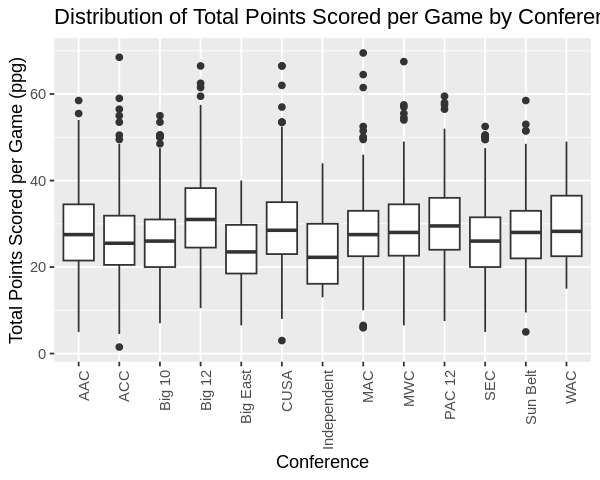

In [42]:
cfb_conf <- cfb %>%
  filter(winning_conference == losing_conference) %>%
  mutate(ppg = (winning_points + losing_points) / 2)

library(ggplot2)
ggplot(cfb_conf, aes(x = winning_conference, y = ppg)) +
  geom_boxplot() +
  theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
  ggtitle("Distribution of Total Points Scored per Game by Conference (2011-2015)") +
  xlab("Conference") +
  ylab("Total Points Scored per Game (ppg)")
#Big 12 has the highest scores and independent has the lowest. These differences can be real as the total socres gained per conference depends on the level of the teams which participated in the game. 
#If the average level of the team is higher than other conference, it's very possible that the average points got in the conference will be higher than other conferences. 

**(b)** In football, two main offensive tactics to gain yardage territory are rushing and passing. Using the techniques we learned in class for filtering and reshaping data, create a new table which contains only the data among Big 10 conference teams and shows the passing and rushing yardage for each year and week for each team. (1 point) 

If we sort such a table chronologically and in alphabetical order of team name, the first few rows are:

    # A tibble: 774 × 5
      year week  team           pass_yards rush_yards
      <int> <fct> <chr>              <int>      <int>
    1  2011 5     Michigan             217        363
    2  2011 5     Illinois             391         82
    3  2011 5     Penn State           271        193
    4  2011 5     Michigan State       250         71
    5  2011 5     Wisconsin            255        231

Note: It is fine to create two dataframes and combine them together at the end. 

In [41]:
cfb_big10 <- cfb %>%
  filter(winning_conference == "Big 10" | losing_conference == "Big 10") %>%
  mutate(team = ifelse(winning_conference == "Big 10", winning, losing),
         pass_yards = ifelse(winning_conference == "Big 10", winning_pass_yards, losing_pass_yards),
         rush_yards = ifelse(winning_conference == "Big 10", winning_rush_yards, losing_rush_yards)) %>%
  select(year, week, team, pass_yards, rush_yards) %>%
  arrange(year, team, week)
print(cfb_big10)

# A tibble: 726 × 5
    year week  team     pass_yards rush_yards
   <int> <chr> <chr>         <int>      <int>
 1  2011 1     Illinois        271        202
 2  2011 3     Illinois        135        105
 3  2011 4     Illinois        167        296
 4  2011 5     Illinois        391         82
 5  2011 6     Illinois        210        308
 6  2011 Bowl  Illinois        148        178
 7  2011 1     Indiana         272        103
 8  2011 2     Indiana         171        148
 9  2011 4     Indiana         354         50
10  2011 10    Iowa            171        131
# … with 716 more rows


**(c)** Some teams rely more on passing to gain yardage, while other rely more on rushing. Create an appropriate 
plot that visualizes the joint distribution of passing and rushing yardage for each team over. In your opinion, are there any outliers? What are they? Is there any reason for them to be outlying? (1 point) 

Note: you may need to use dplyr to extract the outliers from the table data. 

# A tibble: 0 × 5
# … with 5 variables: year <int>, week <chr>, team <chr>, pass_yards <int>,
#   rush_yards <int>


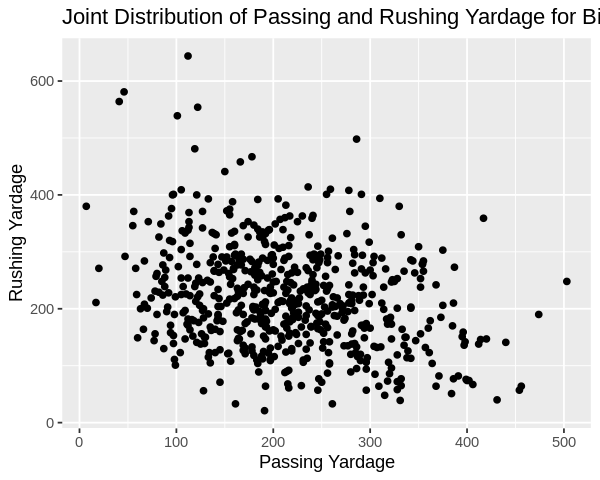

In [40]:
big10_teams <- cfb %>%
  filter(winning_conference == "Big 10") %>%
  select(year, week, team = winning, pass_yards = winning_pass_yards, rush_yards = winning_rush_yards) %>%
  unique()

ggplot(big10_teams, aes(x = pass_yards, y = rush_yards)) +
  geom_point() +
  ggtitle("Joint Distribution of Passing and Rushing Yardage for Big 10 Teams") +
  xlab("Passing Yardage") +
  ylab("Rushing Yardage")

outliers <- big10_teams %>%
  filter(pass_yards > 2500 | rush_yards > 2500)
show(outliers)
# In my opinion, there are some outliners. They are the points that lie far away from the majority of the points.
#These could be due to various reasons such as a team having a particularly strong game in a certain year or week, or a team using a different offensive strategy in a specific game.

## Problem 4 (Challenge problem) 
The column `winning_h_a_n` shows whether the winning team was playing at **H**ome, **A**way, or on a **N**eutral field (not home to either team). Filter only to the records related to Michigan and produce a table which has five columns: `year`, `week`, `points`, `venue`, `outcome` where venue is `H/A/N` for `Home/Away/Neutral` and outcome is `winning` or `losing`. A subset of this table is provided below for reference: 

    # A tibble: 176 × 5
        year week  venue outcome points
       <int> <chr> <chr> <chr> <int>  
     1  2011  1      H   winning   34        
     2  2011  1      A   losing    10             
     3  2011  2      H   winning   35              
     4  2011  2      A   losing    31      
     5  2011  3      H   winning   31                          
     6  2011  3      A   losing    3             
     7  2011  4      H   winning   28             
     8  2011  4      A   losing    7            
     9  2011  5      H   winning   58       
     10 2011  5      A   losing    0           

Michigan Stadium, nicknamed "The Big House," is the football stadium for the University of Michigan with the capacity of 107,601 which can potentially house 100,000+ Wolverine fans.

Does Michigan win more *at the Big House* ? In other words, is the proportion of games won by Michigan statistically different from proportion of games won by the away team at the Big House ? Use the above table to perform a hypothesis test and draw conclusion.

(Hint: In STATS 250 you learned how to test this. This test is implemented in R using the binom.test function.)

In [72]:
michigan_table <- michigan_games %>%
  mutate(venue = ifelse(winning == "Michigan", winning_h_a_n, losing_h_a_n),
         outcome = ifelse(winning == "Michigan", "winning", "losing"),
         points = ifelse(winning == "Michigan", winning_points, losing_points)) %>%
  select(year, week, points, venue, outcome)
print(michigan_table)


# A tibble: 88 × 5
    year week  points venue outcome
   <int> <chr>  <int> <chr> <chr>  
 1  2011 1         34 H     winning
 2  2011 2         35 H     winning
 3  2011 3         31 H     winning
 4  2011 4         28 H     winning
 5  2011 5         58 H     winning
 6  2011 6         42 A     winning
 7  2011 7         14 A     losing 
 8  2011 9         36 H     winning
 9  2011 10        16 A     losing 
10  2011 11        31 A     winning
# … with 78 more rows
